In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    
def plot_violin_graph(list_of_data, title):
    # Create a figure instance
    label = ["Cossine", "MSD", "Pearson", "Pearson Baseline"]
    fig = plt.figure()
  
    # Create an axes instance
    ax = fig.gca()
    ax.set_title(title)
    set_axis_style(ax, label)
    # Create the violinplot
    violinplot = ax.violinplot(list_of_data)
    plt.show()
    

In [3]:
cossine_fold_0 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_cosine_0.parquet")
cossine_fold_1 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_cosine_1.parquet")
cossine_fold_2 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_cosine_2.parquet")
cossine_fold_3 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_cosine_3.parquet")
cossine_fold_4 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_cosine_4.parquet")

cossine = pd.concat([cossine_fold_0, cossine_fold_1, cossine_fold_2, cossine_fold_3, cossine_fold_4])

In [4]:
msd_fold_0 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_msd_0.parquet")
msd_fold_1 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_msd_1.parquet")
msd_fold_2 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_msd_2.parquet")
msd_fold_3 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_msd_3.parquet")
msd_fold_4 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_msd_4.parquet")

msd = pd.concat([msd_fold_0, msd_fold_1, msd_fold_2, msd_fold_3, msd_fold_4])

In [5]:
pearson_baseline_fold_0 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_pearson_baseline_0.parquet")
pearson_baseline_fold_1 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_pearson_baseline_1.parquet")
pearson_baseline_fold_2 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_pearson_baseline_2.parquet")
pearson_baseline_fold_3 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_pearson_baseline_3.parquet")
pearson_baseline_fold_4 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_pearson_baseline_4.parquet")

pearson_baseline = pd.concat([pearson_baseline_fold_0, pearson_baseline_fold_1, pearson_baseline_fold_2, pearson_baseline_fold_3, pearson_baseline_fold_4])

In [6]:
pearson_fold_0 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_pearson_0.parquet")
pearson_fold_1 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_pearson_1.parquet")
pearson_fold_2 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_pearson_2.parquet")
pearson_fold_3 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_pearson_3.parquet")
pearson_fold_4 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_pearson_4.parquet")

pearson = pd.concat([pearson_fold_0, pearson_fold_1, pearson_fold_2, pearson_fold_3, pearson_fold_4])

In [7]:
est_list = [
    cossine["est"].to_list(),
    msd["est"].to_list(),
    pearson["est"].to_list(),
    pearson_baseline["est"].to_list(),
]

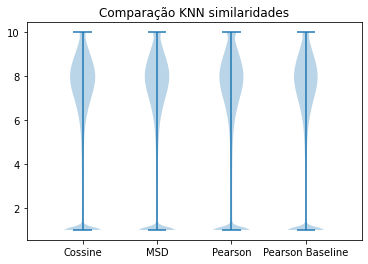

In [8]:
plot_violin_graph(est_list, title="Comparação KNN similaridades")

In [9]:
def round_est_values(df):
    round_actual = np.round(df["est"], decimals=0)
    round_actual = round_actual.reset_index()
    df = df.reset_index()[["index", "actual", "details"]]
    df = df.merge(round_actual, on="index", how="left")
    df = df.set_index("index")
    grouped = df.groupby("est", as_index=False).count()
    return grouped

In [10]:
cossine_grouped = round_est_values(cossine)
print(cossine_grouped)

    est   actual  details
0   1.0  3560080  3560080
1   2.0   443585   443585
2   3.0   429495   429495
3   4.0   518900   518900
4   5.0   886150   886150
5   6.0  2163930  2163930
6   7.0  5194900  5194900
7   8.0  7432945  7432945
8   9.0  4634091  4634091
9  10.0  1153900  1153900


In [11]:
msd_grouped = round_est_values(msd)
print(msd_grouped)

    est   actual  details
0   1.0  3579365  3579365
1   2.0   458366   458366
2   3.0   437400   437400
3   4.0   545655   545655
4   5.0   920800   920800
5   6.0  2147070  2147070
6   7.0  5014240  5014240
7   8.0  7218390  7218390
8   9.0  4709275  4709275
9  10.0  1387415  1387415


In [12]:
pearson_baseline_grouped = round_est_values(pearson_baseline)
print(pearson_baseline_grouped)

    est   actual  details
0   1.0  3676550  3676550
1   2.0   363370   363370
2   3.0   375470   375470
3   4.0   488700   488700
4   5.0   898090   898090
5   6.0  2214175  2214175
6   7.0  5148136  5148136
7   8.0  7212455  7212455
8   9.0  4727660  4727660
9  10.0  1313370  1313370


In [13]:
pearson_grouped = round_est_values(pearson)
print(pearson_grouped)

    est   actual  details
0   1.0  3618381  3618381
1   2.0   447220   447220
2   3.0   433450   433450
3   4.0   537355   537355
4   5.0   909120   909120
5   6.0  2186550  2186550
6   7.0  5045990  5045990
7   8.0  7084640  7084640
8   9.0  4614760  4614760
9  10.0  1540510  1540510


In [14]:
cossine_grouped = cossine_grouped.rename(columns={"actual": "cossine"})
msd_grouped = msd_grouped.rename(columns={"actual": "msd"})
pearson_baseline_grouped = pearson_baseline_grouped.rename(columns={"actual": "pearson baseline"})
pearson_grouped = pearson_grouped.rename(columns={"actual": "pearson"})

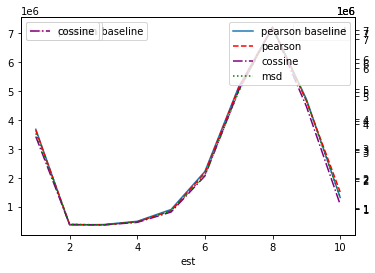

In [15]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax2 = ax.twinx()
ax3 = ax.twinx()

cossine_grouped.plot(x="est", y=["cossine"], ax=ax2, ls="dashdot", color="purple")
msd_grouped.plot(x="est", y=["msd"], ax=ax3, ls="dotted", color="green")
pearson_baseline_grouped.plot(x="est", y=["pearson baseline"], ax=ax)
pearson_grouped.plot(x="est", y=["pearson"], ax=ax1, ls="dashed", color="red")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)